**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

**Load Data**

In [2]:
# load the csv data to DataFrame
df = pd.read_csv('./gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Check the last 5 rows
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [3]:
# Check number of rows and columns
df.shape

(2290, 6)

In [5]:
# Getting basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# Check the missing Value
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# Get the statistical measure of data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Check the Correlation with Seaborn**
1. Positive Correlation
2. Negative Correlation

<AxesSubplot:>

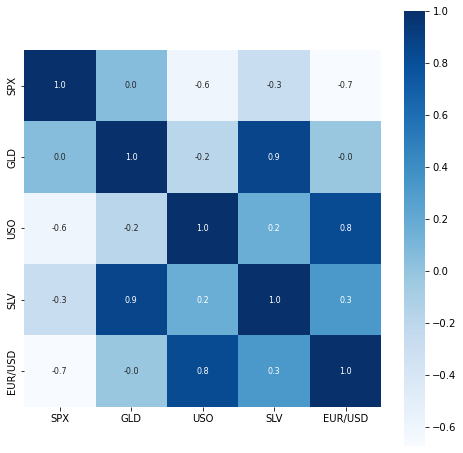

In [8]:
# Construct a heatmap to understand the correlation
correlation = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [9]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

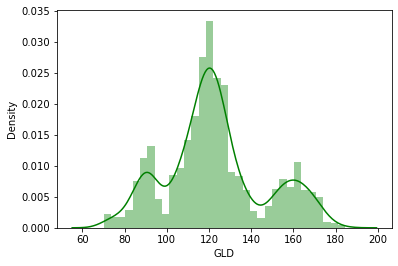

In [10]:
# Checking the distribution of GLD Price
sns.distplot(df['GLD'], color="green")

**Split Data**

In [11]:
X = df.drop(['Date','GLD'], axis=1)
Y = df['GLD']

X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [12]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

**Train the model**

In [14]:
model = RandomForestRegressor(n_estimators=100)
#training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

**Evaluate the model**

In [15]:
test_pred = model.predict(X_test)
print(test_pred)

[168.30709904  81.86499961 115.95249986 127.57440051 120.95700117
 154.77339733 150.17199823 126.13320022 117.41069892 125.92720092
 116.53660114 172.7110005  141.84699806 167.67399797 115.15860022
 117.86570054 138.32780335 170.10410044 159.19660304 157.60129919
 155.15379983 124.95310031 176.14160015 156.9046036  125.1902006
  93.75849987  77.58039985 120.63750008 119.05429899 167.60520031
  88.2585002  125.22819977  91.16030068 117.7117001  121.10599936
 136.39410084 115.48810146 115.18090048 146.17429949 107.22750101
 104.48950217  87.26809818 126.54780019 118.13639987 152.68499924
 119.86639978 108.33179996 108.24899845  93.10100062 127.18659794
  74.97230043 113.62319876 121.62840033 111.24339894 118.80029871
 120.66649965 159.19279932 167.64240175 146.71309675  86.02079852
  94.50460035  86.97819872  90.56500038 119.03000084 126.41310065
 127.49980051 170.49240056 122.23259917 117.43909885  98.21120012
 167.88390168 142.8109977  131.65170249 121.14860238 120.91079931
 119.712900

In [16]:
# R squared error
r2_error = metrics.r2_score(Y_test, test_pred)
print(f'R2 Squared Error: {r2_error}')

R2 Squared Error: 0.9893467219332913


**Visualize the actual values and Predicted values**

In [17]:
Y_test = list(Y_test)

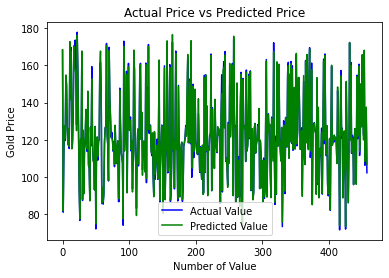

In [20]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Value')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

as we see the value are very close to each other so that the predicted price didnt different too much from actual price